<div style="border-radius:10px;
            border:#0b0265 solid;
           background-color:#85e0e0;
           font-size:110%;
           letter-spacing:0.5px;
            text-align: center">

<center><h1 style="padding: 25px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Customer Segmentation (Clustering) 🛍️🛒</h1></center>    

</div>

<p align="center">
  <img width="750" height="300" src="https://blog.intercomassets.com/blog/wp-content/uploads/2020/10/Customer-segmentation-performance-matrix.png">
</p>

# <a name="toc"></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
Table of Contents</h3></center>
</div>

- [1. Introduction](#Problem_Statement)  
- [2. Import Libraries and Data](#Import_Libraries_and_Data)
- [3. Handling Missing Values](#Handling_Missing_Values)
- [4. Scaling](#Scaling)
- [5. Data Visualization](#Visualization)
- [6. Clustering and analysis](#Clustering )




## <a name='Introduction'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            letter-spacing:0.5px;">

<h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
1. Introduction</h3>
</div>

***Customer segmentation analysis *** entails the stratification of a company's clientele into distinct cohorts based on attributes such as purchasing behavior, demographics, engagement, lifetime value, preferences, and feedback. This meticulous process commences with the collection and purification of data, followed by an exploratory data analysis (EDA) to discern salient patterns. Advanced clustering algorithms, such as K-means, are employed to delineate meaningful segments. The primary objective is to attain a profound comprehension of customer behaviors and preferences, thereby enabling the formulation of bespoke marketing strategies and tailored product offerings. The culmination of this analysis is a comprehensive report and sophisticated visualizations, furnishing actionable insights to aid stakeholders in augmenting customer satisfaction and propelling business growth.

# <a name='Import_Libraries_and_Data'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
2. Import Libraries and Data</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [ ]:
# handle table-like data and matrices
import pandas as pd
import numpy as np

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


# preprocessing
from sklearn.preprocessing import MinMaxScaler

# clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

# evaluations
from sklearn.metrics import silhouette_score

# ignore warnings
import warnings
warnings.filterwarnings('ignore')



In [ ]:
data = pd.read_csv('ecom customer.csv' )

In [ ]:
data.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [ ]:
df=data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Cust_ID                 30000 non-null  int64 
 1   Gender                  27276 non-null  object
 2   Orders                  30000 non-null  int64 
 3   Jordan                  30000 non-null  int64 
 4   Gatorade                30000 non-null  int64 
 5   Samsung                 30000 non-null  int64 
 6   Asus                    30000 non-null  int64 
 7   Udis                    30000 non-null  int64 
 8   Mondelez International  30000 non-null  int64 
 9   Wrangler                30000 non-null  int64 
 10  Vans                    30000 non-null  int64 
 11  Fila                    30000 non-null  int64 
 12  Brooks                  30000 non-null  int64 
 13  H&M                     30000 non-null  int64 
 14  Dairy Queen             30000 non-null  int64 
 15  Fe

In [ ]:
df.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


# <a name='Handling_Missing_Values'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
3. Handling Missing Values</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

let's find if we have missing values in the dataset.

In [ ]:
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 Cust_ID                      0
Gender                    2724
Orders                       0
Jordan                       0
Gatorade                     0
Samsung                      0
Asus                         0
Udis                         0
Mondelez International       0
Wrangler                     0
Vans                         0
Fila                         0
Brooks                       0
H&M                          0
Dairy Queen                  0
Fendi                        0
Hewlett Packard              0
Pladis                       0
Asics                        0
Siemens                      0
J.M. Smucker                 0
Pop Chips                    0
Juniper                      0
Huawei                       0
Compaq                       0
IBM                          0
Burberry                     0
Mi                           0
LG                           0
Dior                         0
Scabal                       0
Tommy H

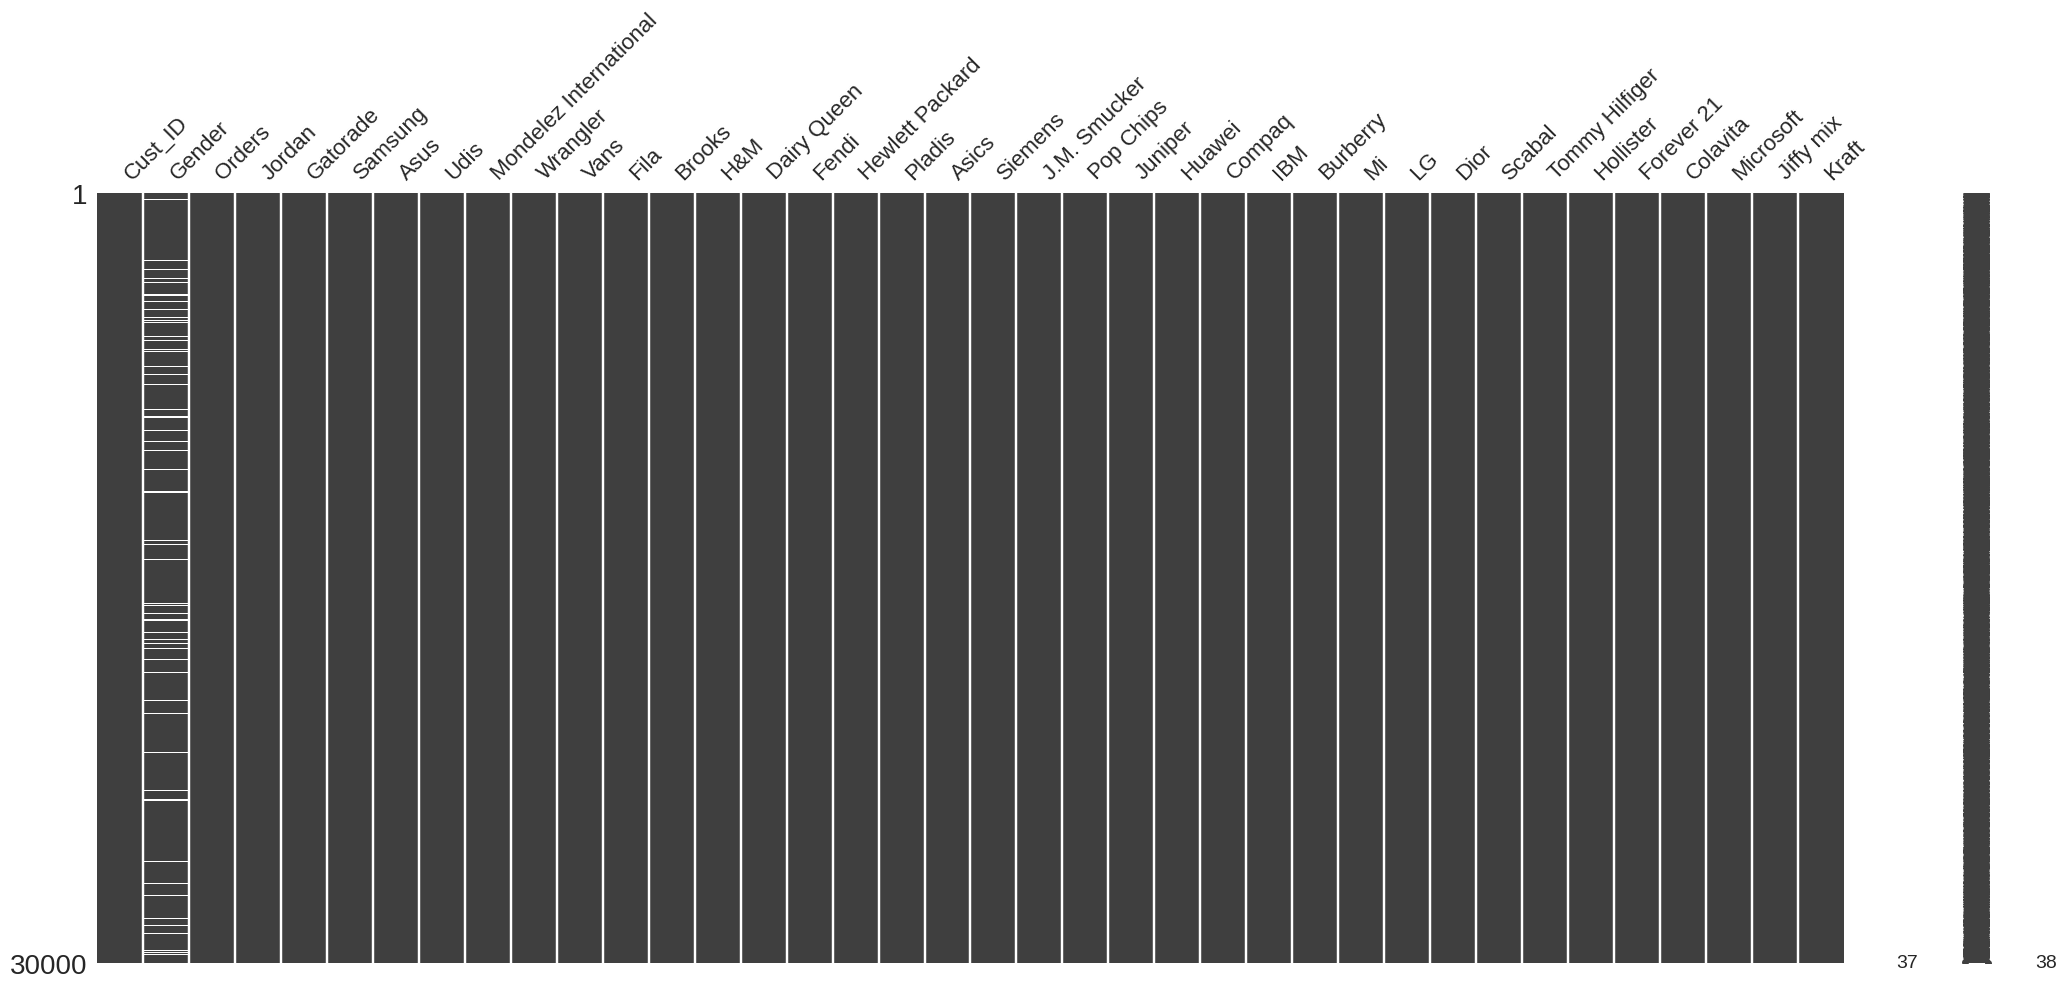

In [ ]:
msno.matrix(data);

In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [ ]:
data.isnull().sum()

Cust_ID                   0
Gender                    0
Orders                    0
Jordan                    0
Gatorade                  0
Samsung                   0
Asus                      0
Udis                      0
Mondelez International    0
Wrangler                  0
Vans                      0
Fila                      0
Brooks                    0
H&M                       0
Dairy Queen               0
Fendi                     0
Hewlett Packard           0
Pladis                    0
Asics                     0
Siemens                   0
J.M. Smucker              0
Pop Chips                 0
Juniper                   0
Huawei                    0
Compaq                    0
IBM                       0
Burberry                  0
Mi                        0
LG                        0
Dior                      0
Scabal                    0
Tommy Hilfiger            0
Hollister                 0
Forever 21                0
Colavita                  0
Microsoft           

let's find if we have duplicate rows.

In [ ]:
df[df.duplicated()]

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft


In [ ]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [ ]:
df.isna().sum().sum()

0

# <a name='Scaling'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
4. Scaling</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [ ]:
x=df.iloc[:,2:].values
x

array([[7, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [7, 0, 1, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [3, 2, 0, ..., 0, 0, 0]])

In [ ]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)

In [ ]:
scaler=MinMaxScaler()
features=scaler.fit_transform(x)
features

array([[0.58333333, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.        , 0.06666667, ..., 0.07142857, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.06666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.08333333, 0.        , ..., 0.        , 0.        ,
        0.        ]])

# <a name='Feature_Engineering'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
5. Data Visualization</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [ ]:
df['Gender'].value_counts()

Gender
F    24778
M     5222
Name: count, dtype: int64

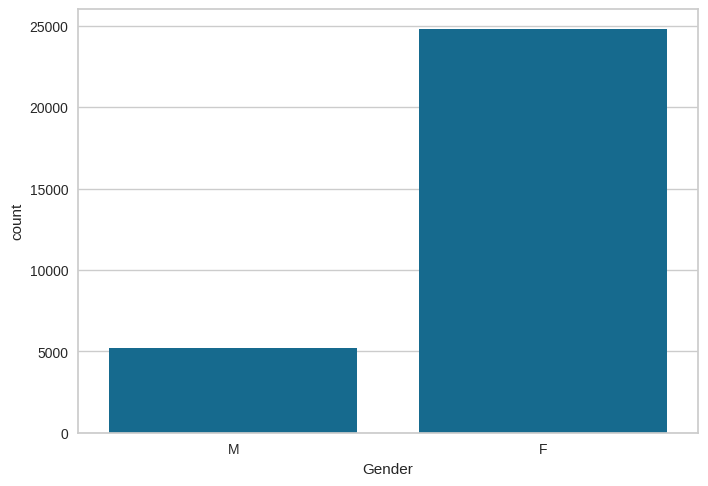

In [ ]:
sns.countplot(x='Gender', data=df)
plt.show()

<Axes: xlabel='Orders', ylabel='count'>

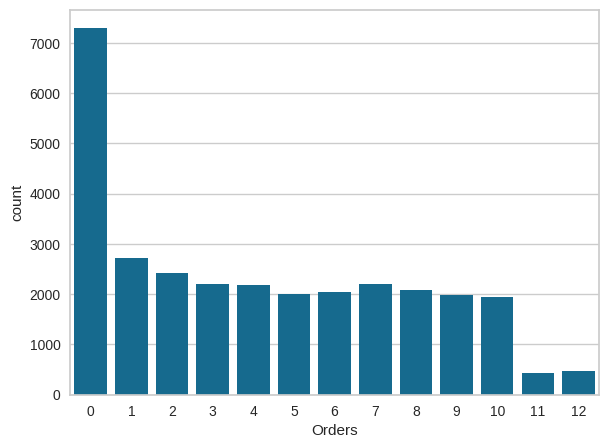

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Orders')

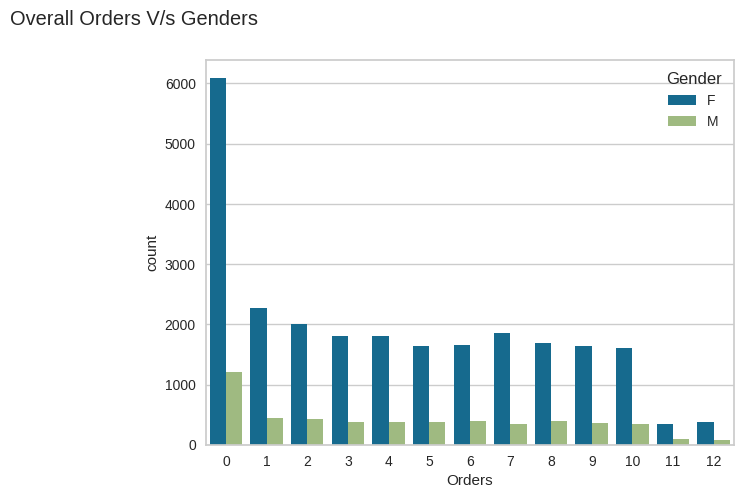

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 2)#(Row,coulumn,index)
sns.countplot(data=df, x='Orders',hue='Gender')
plt.suptitle('Overall Orders V/s Genders')
plt.show()

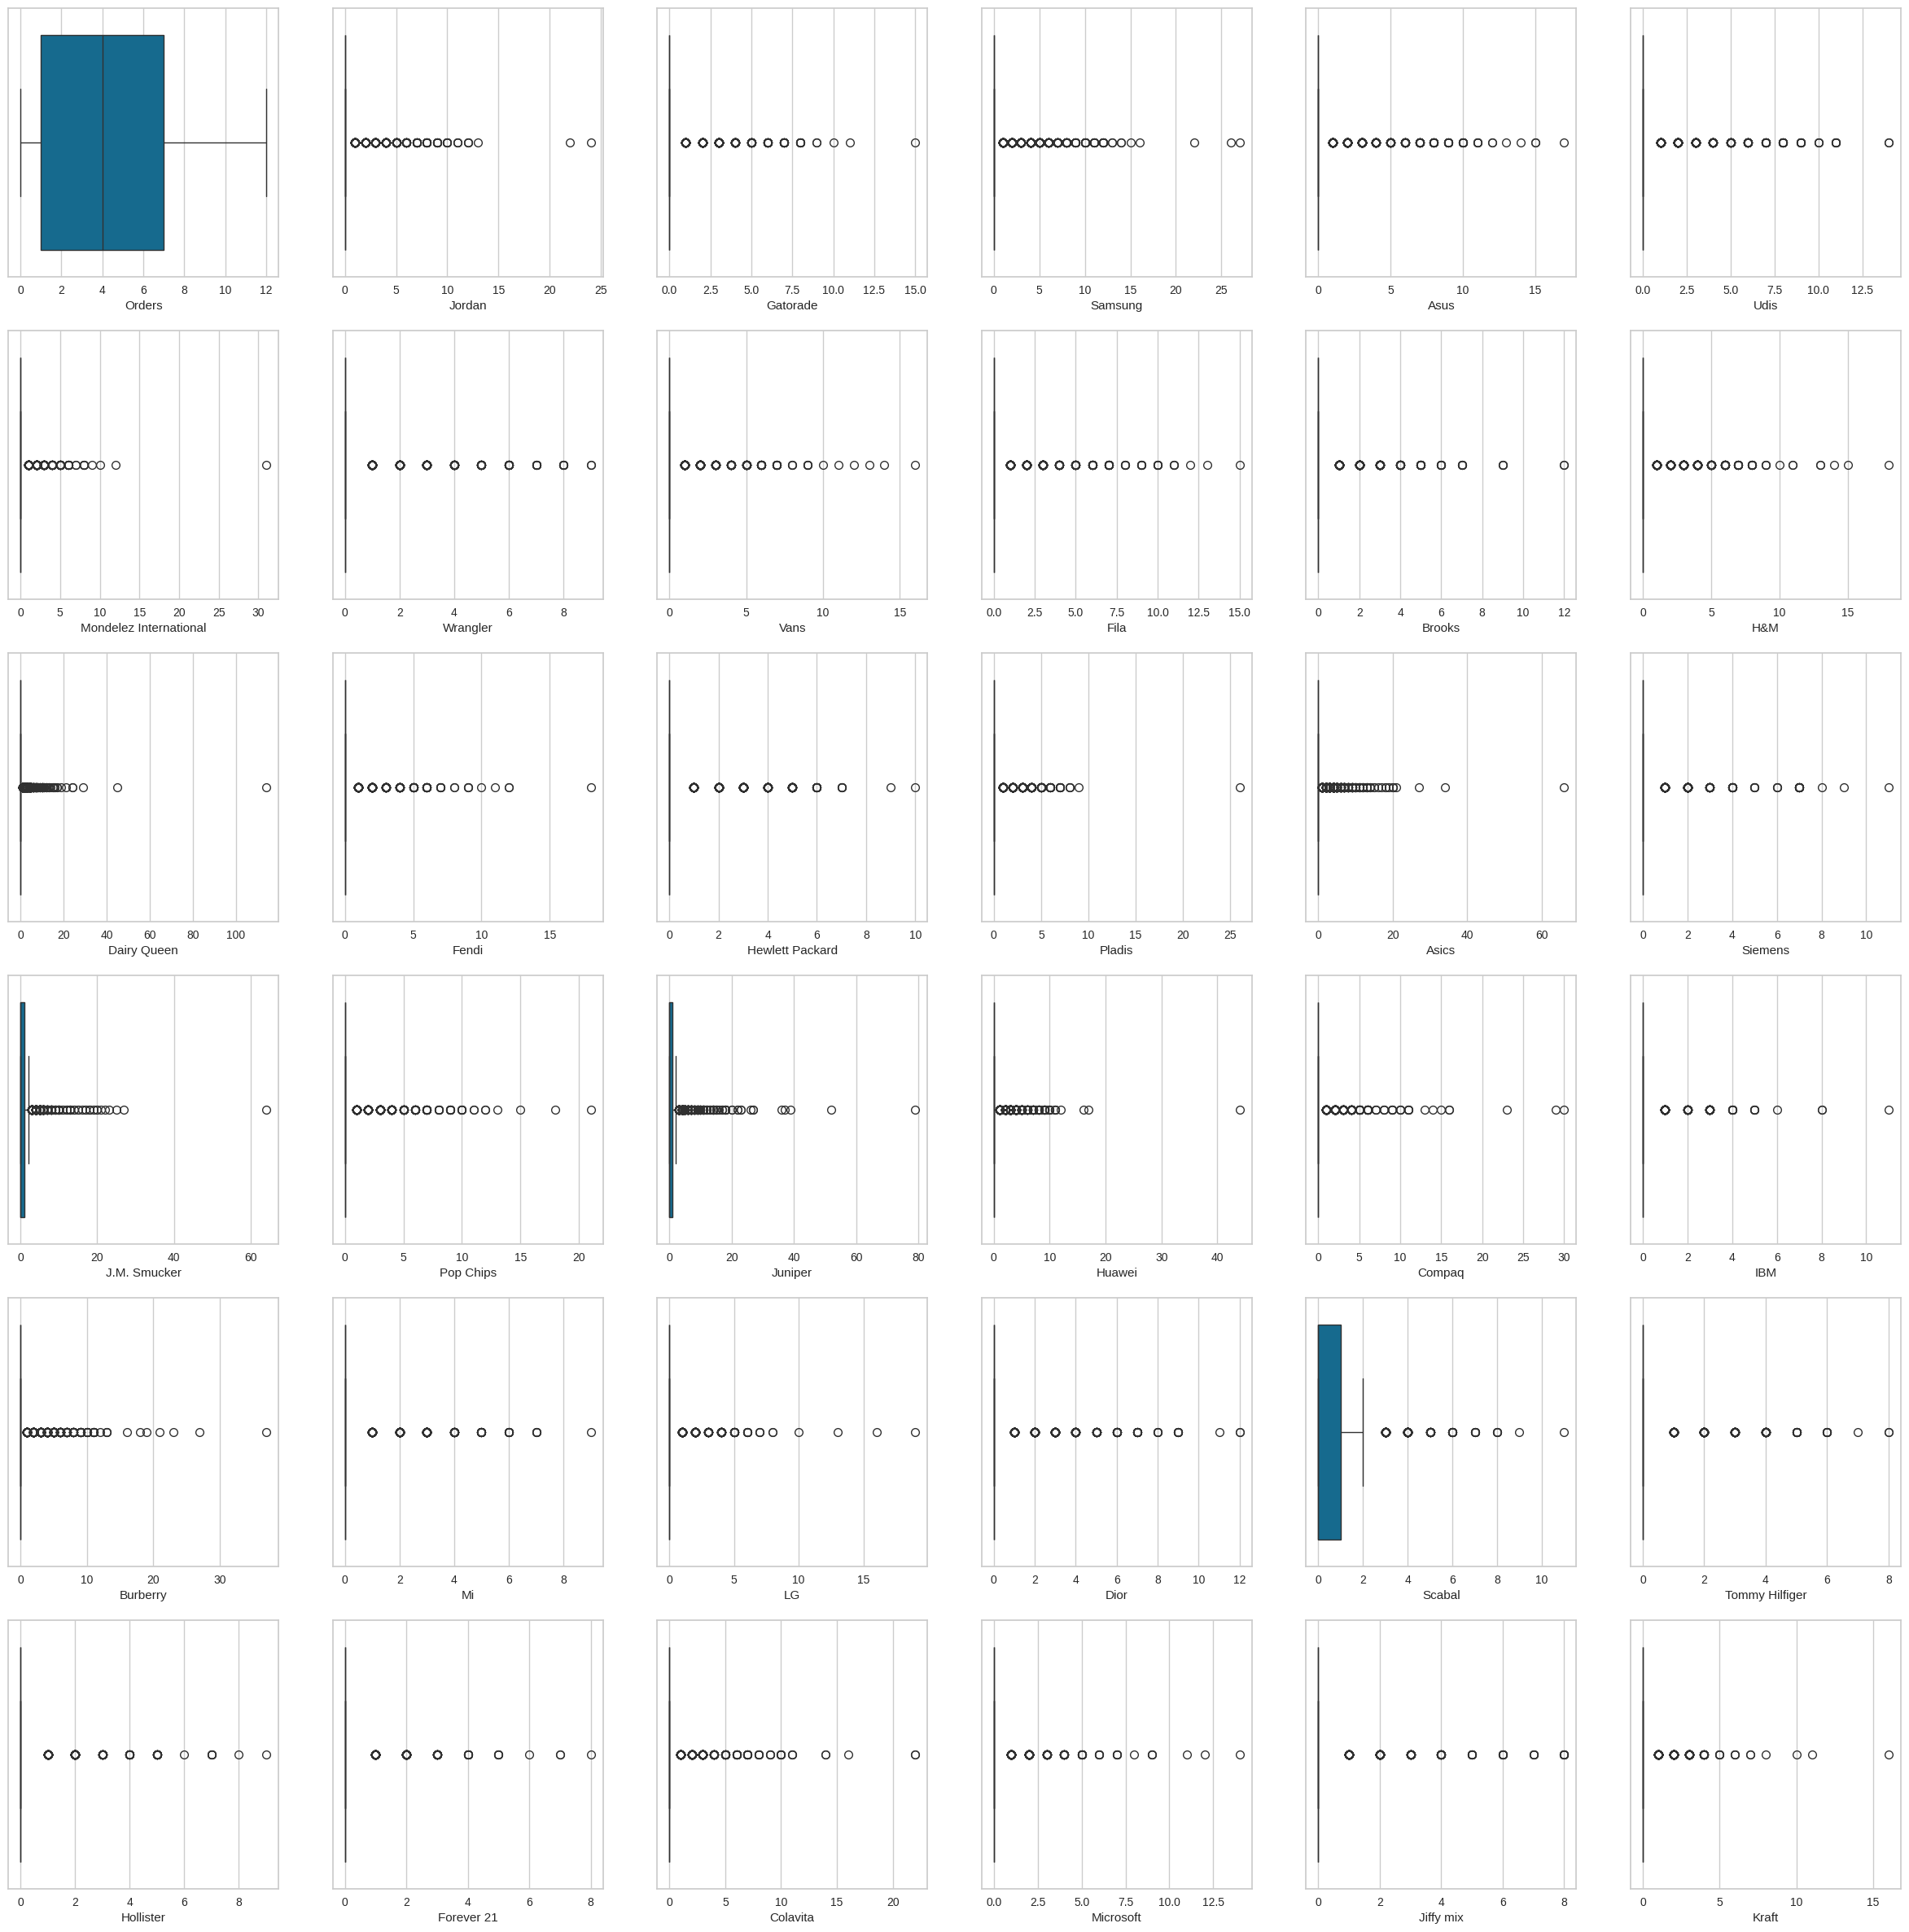

In [ ]:
#orders and searches for each brands

cols=list(df.columns[2:])
def dist_list(lst):
  plt.figure(figsize=(30,30))
  for i,col in enumerate(lst,1):
    plt.subplot(6,6,i)
    sns.boxplot(data=df,x=df[col])
dist_list(cols)

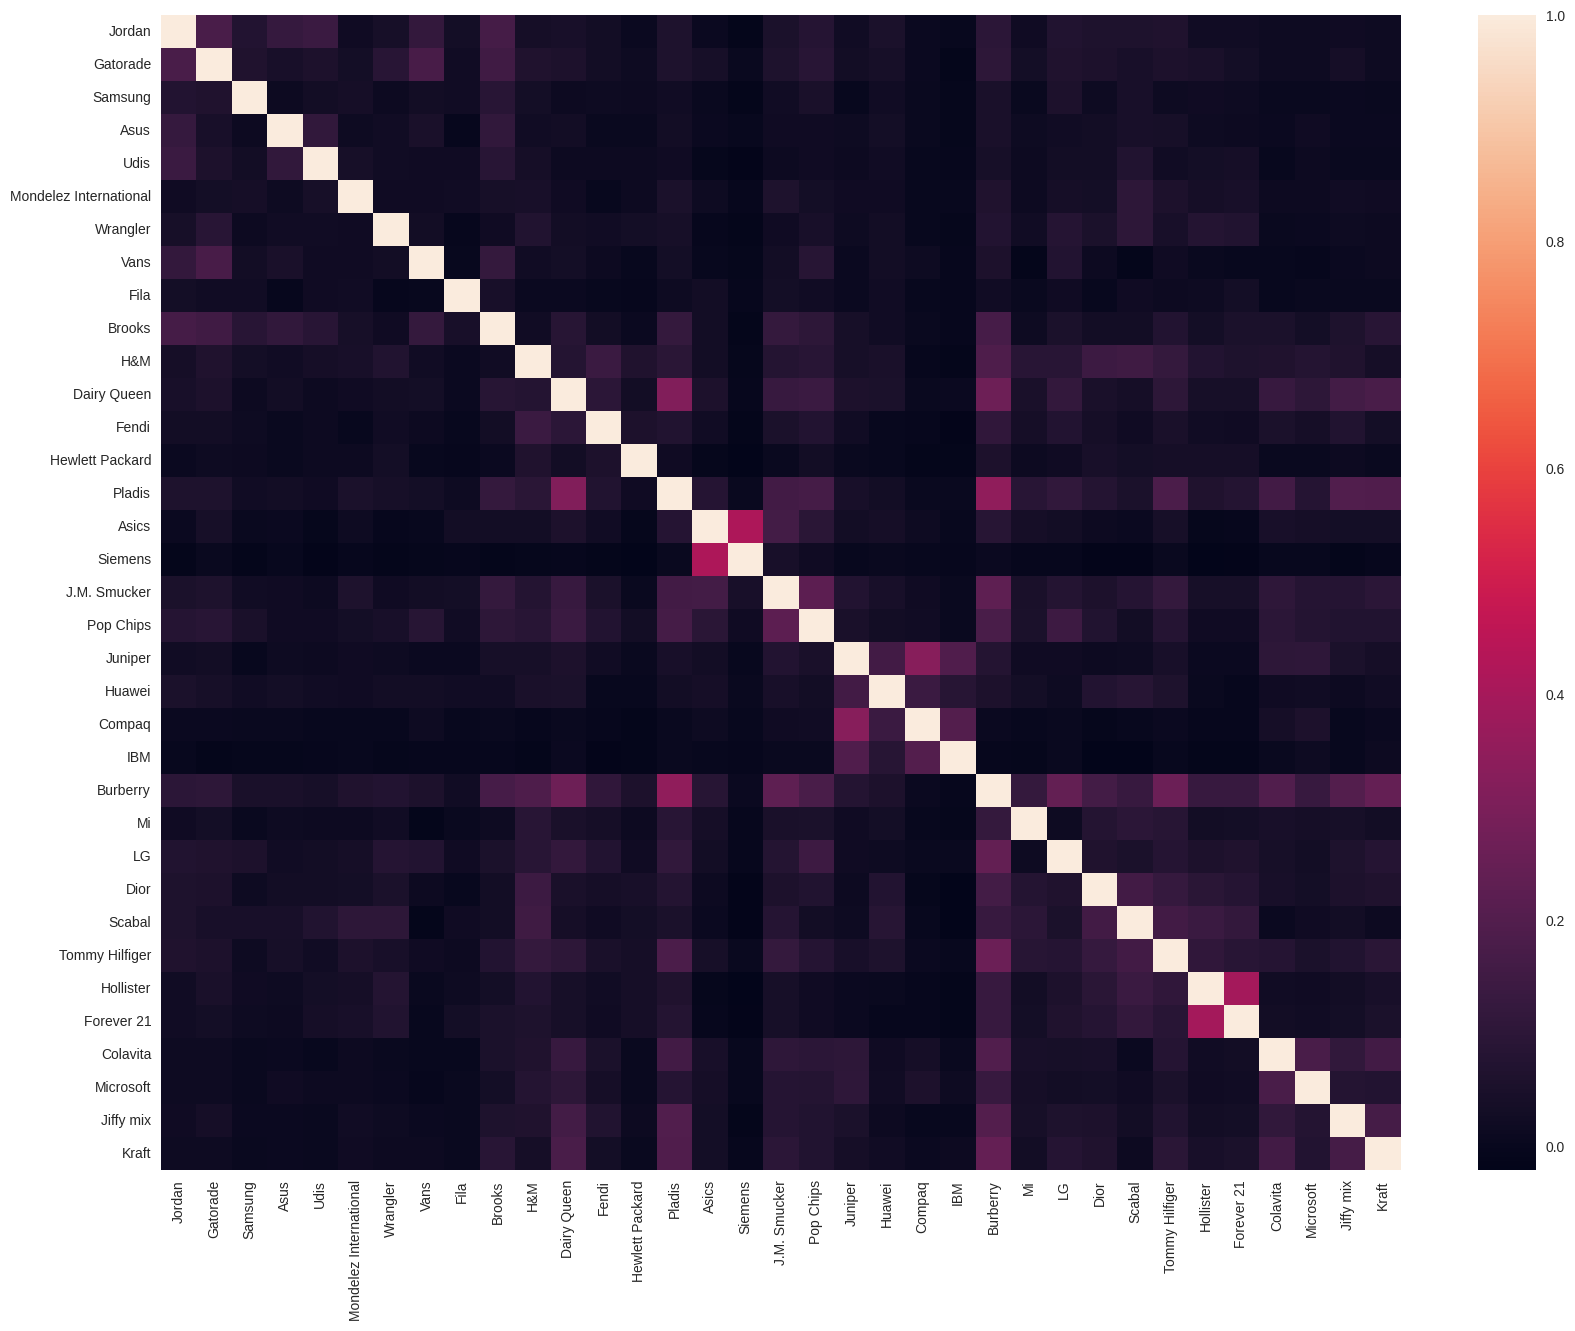

In [ ]:
#Heatmap
plt.figure(figsize=(20,15))
sns.heatmap(df.iloc[:,3:].corr()) #iloc[:, 3:] from 4th column
plt.show()

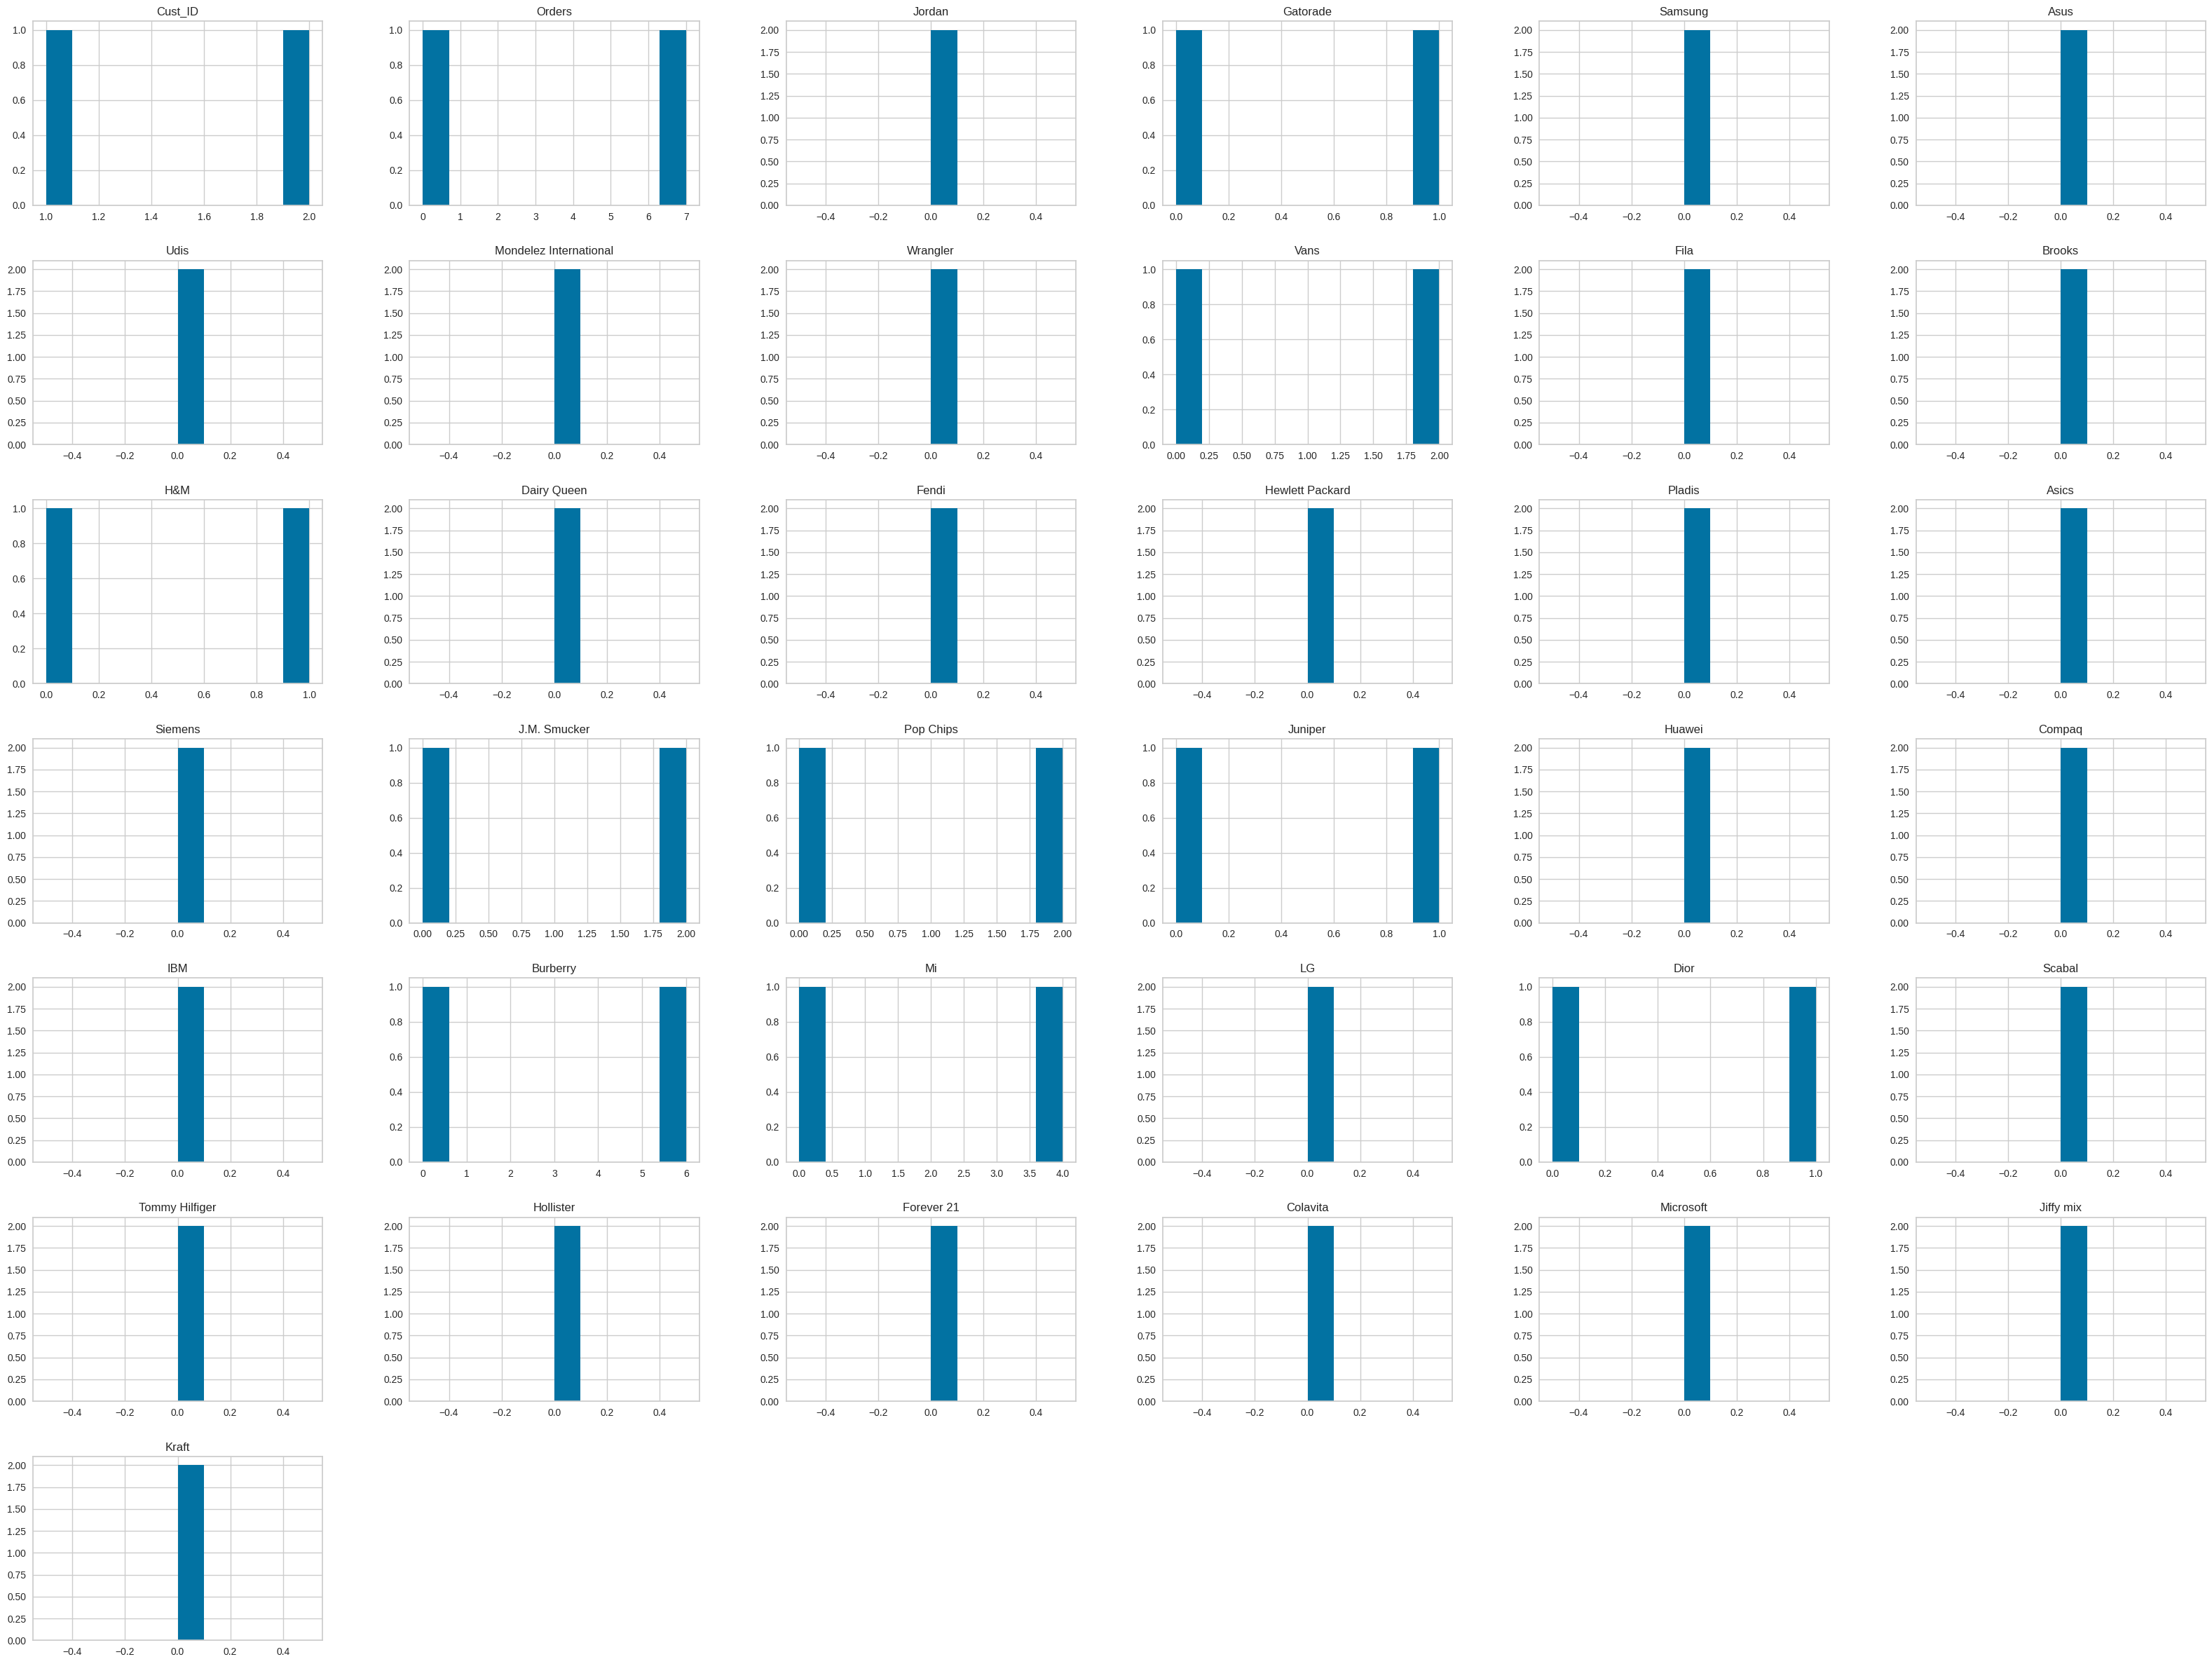

In [ ]:
df.iloc[:2,:].hist(figsize=(40,30))
plt.show()#It generates histogram to visualize numerical data in dataset.Each histogram represents the frequency distribution in a single numerical coulumn.The size of the figure containing all the histogram is 30 by 40 in..
#It is useful for measuring the central tendency or dispersion..

In [ ]:
new_df = df.copy()
new_df['Total Search'] = new_df.iloc[:, 3:].sum(axis=1)

In [ ]:
new_df.sort_values('Total Search', ascending=False)
#sort the value of total search in descending order

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
9911,9912,F,2,0,11,0,0,0,0,6,...,2,8,4,9,1,4,1,3,6,160
24365,24366,F,2,3,3,2,2,0,1,2,...,2,2,6,4,1,4,3,3,2,136
4129,4130,F,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,127
888,889,F,0,2,1,3,2,0,1,3,...,3,1,5,3,2,5,1,3,4,109
15015,15016,F,10,2,2,2,0,0,0,0,...,0,1,0,0,1,7,4,2,2,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,15001,F,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
7247,7248,F,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7255,7256,M,8,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7259,7260,F,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


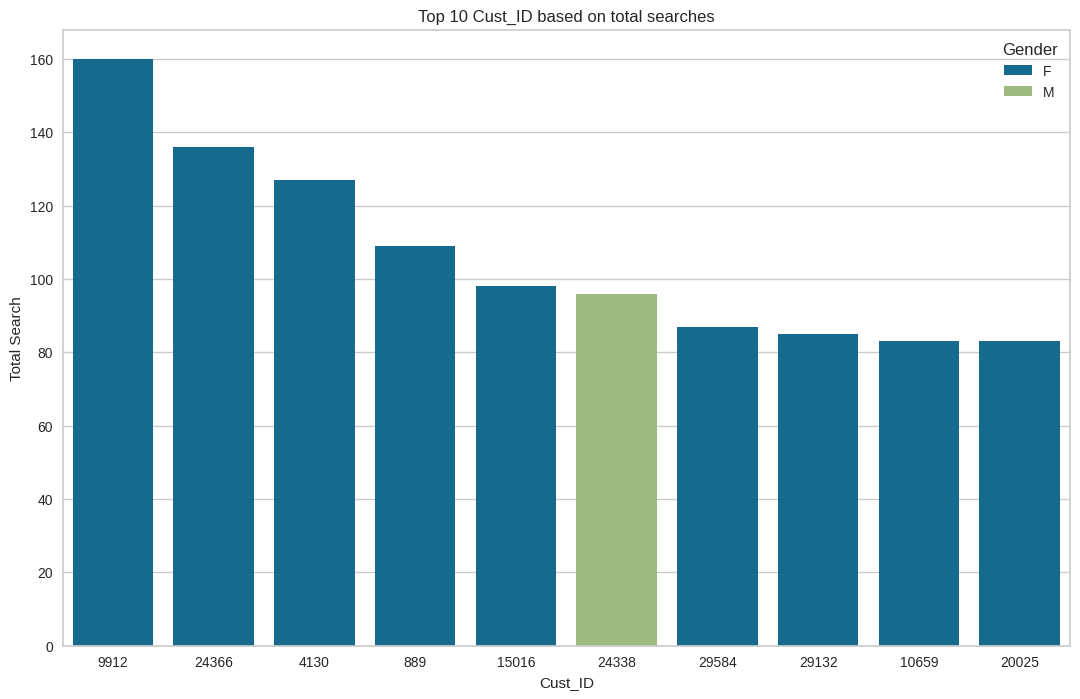

In [ ]:
plt.figure(figsize=(13, 8))
plt_data = new_df.sort_values('Total Search', ascending=False)[['Cust_ID', 'Gender', 'Total Search']].head(10)
sns.barplot(data=plt_data, x='Cust_ID', y='Total Search', hue='Gender', order=plt_data.sort_values('Total Search', ascending =False).Cust_ID)
plt.title("Top 10 Cust_ID based on total searches")
plt.show()

# <a name='Clustering'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
6. Clustering</h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

Elbow Method to determine the number of clusters to be formed.

In [ ]:


# Assuming 'df' is your DataFrame
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Extract numeric features
x = df[numeric_columns].values

# Scale numeric features
scaler = MinMaxScaler()
features = scaler.fit_transform(x)

# K-Means clustering
inertia = []
for i in range(1, 16):
    k_means = KMeans(n_clusters=i)
    k_means = k_means.fit(features)  # Fit KMeans on scaled numeric features
    inertia.append(k_means.inertia_) # It is the sum of sample of their closest cluster center
    #The whole code iterates through different numbers of clustures and computes the inertia for each configuraion for k means algorithm
    #inertia is how internally coherent clusters are lower inertia values indicates the clusters are denser but more cohesive

(Text(0.5, 0, 'No of clusters'), Text(0, 0.5, 'Inertia'))

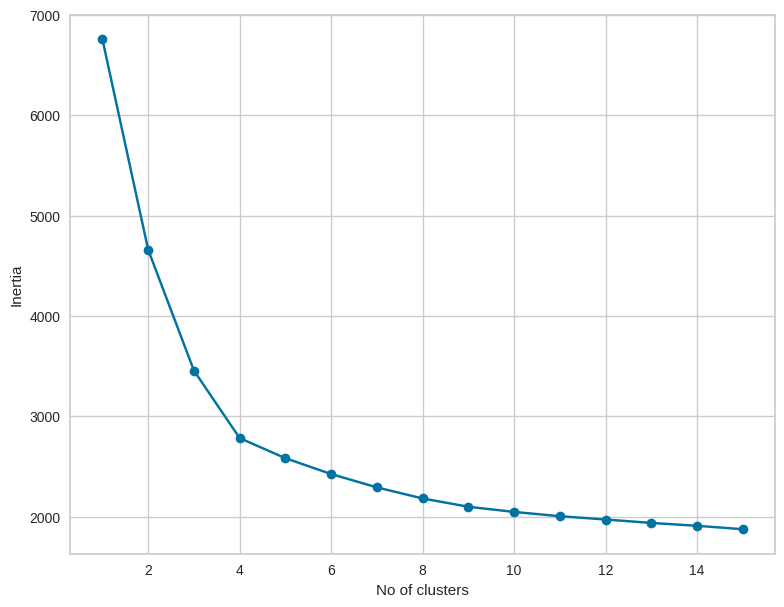

In [ ]:
#Elbow graph
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(range(1,16),inertia,'bo-')#-bo means blue circle
plt.xlabel('No of clusters'), plt.ylabel('Inertia')

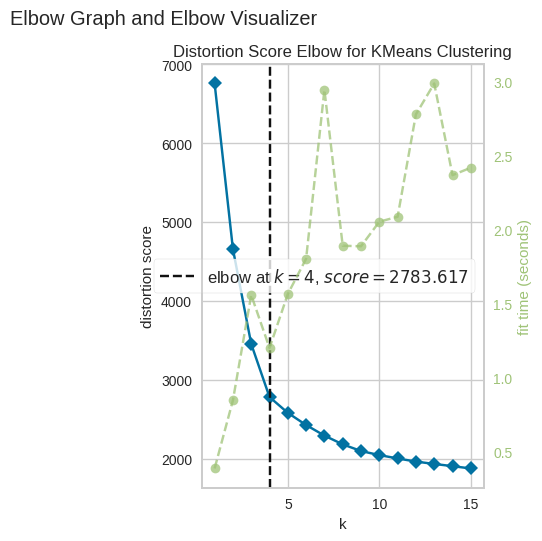

In [ ]:
#Kelbow visualizer
plt.subplot(1,2,2)
kmeans=KMeans()
visualize=KElbowVisualizer(kmeans,k=(1,16))
visualize.fit(features)
plt.suptitle("Elbow Graph and Elbow Visualizer")
visualize.poof()
plt.show()

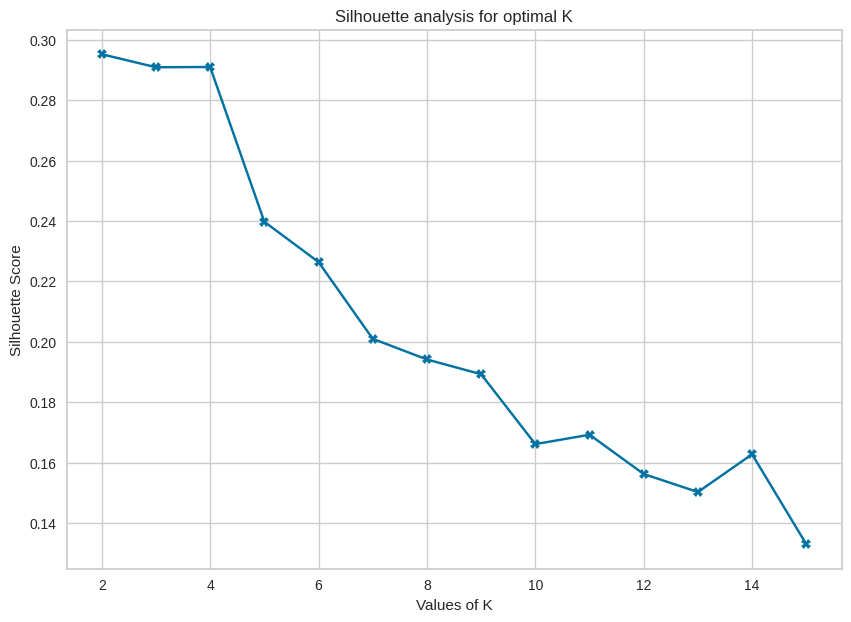

In [ ]:
#Silhouette Score for each k value
#For measuring how well sepererate cluster are  higher silhoutette score indicates better defined cluster

silhouette_avg=[]
for i in range(2,16):
  #initialize kmeans cluster

  kmeans=KMeans(n_clusters=i)
  cluster_labels=kmeans.fit_predict(features)
  #Silhouette score
  silhouette_avg.append(silhouette_score(features,cluster_labels)) #Append each score to the list

plt.figure(figsize=(10,7))
plt.plot(range(2,16),silhouette_avg,'bX-') # Now both arrays have the same length
plt.xlabel('Values of K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette analysis for optimal K')
plt.show()

In [ ]:
model=KMeans(n_clusters=3)
model=model.fit(features)


In [ ]:
y_km=model.predict(features)
centers=model.cluster_centers_

In [ ]:
df['Cluster']=pd.DataFrame(y_km)
df.to_csv("Cluster_data",index=False)

In [ ]:
df["Cluster"].value_counts()

Cluster
2    10393
1     9947
0     9660
Name: count, dtype: int64

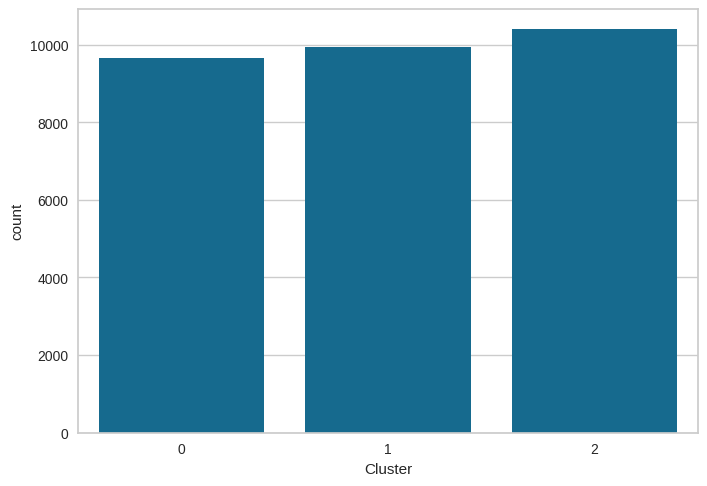

In [ ]:
sns.countplot(data=df,x='Cluster')
plt.show()

In [ ]:
c_df=pd.read_csv('Cluster_data')
c_df.head()

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Cluster
0,1,M,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,F,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,3,M,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,F,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,F,10,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,2


In [ ]:
c_df['Total Search']=c_df.iloc[:,3:38].sum(axis=1)


# <a name='Clusters_Analysis_and_Customers_Profiling'></a>

<div style="border-radius:10px;
            background-color:#ffffff;
            border-style: solid;
            border-color: #0b0265;
            letter-spacing:0.5px;">

<center><h3 style="padding: 5px 0px; color:#0b0265; font-weight: bold; font-family: Cursive">
7. Clusters Analysis </h3></center>
</div>

<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" style="color:white" data-toggle="popover">Back to Table of Contents</a>

In [ ]:
#analyze the cluster 0

cl_0=c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster==0')
cl_0

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,F,188508950,16459,2511,1828,2243,1856,1676,1369,...,2855,3883,1460,1026,712,1615,932,683,717,62758
1,0,M,32684585,2982,563,719,336,13,38,115,...,214,144,104,82,39,220,128,89,126,8116


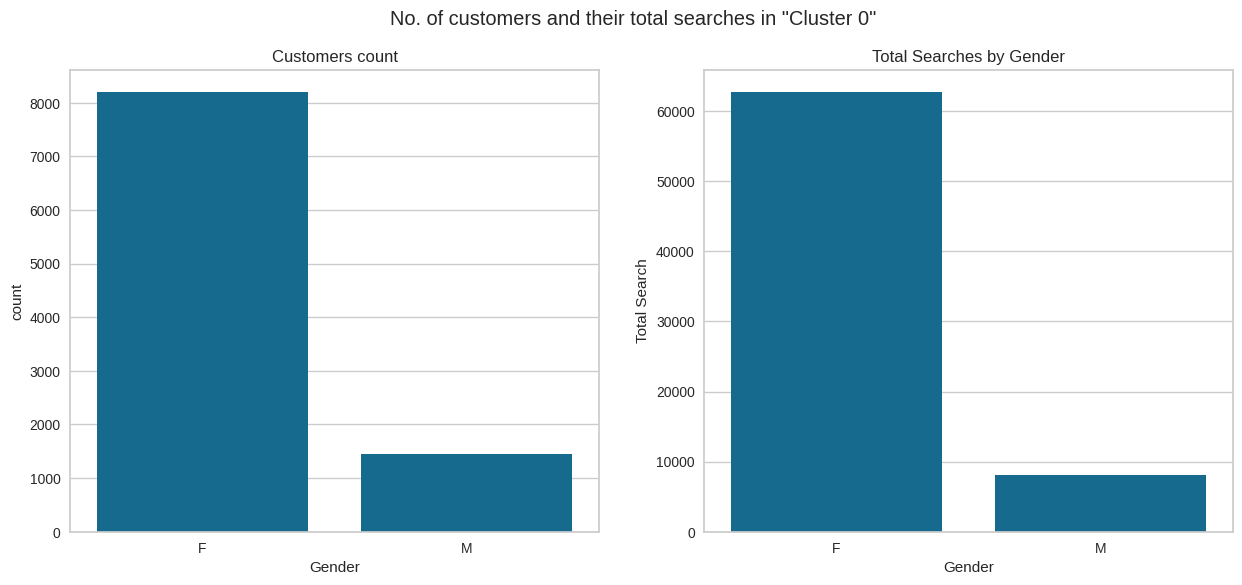

In [ ]:
plt.figure(figsize=(15,6)) # Change fig_size to figsize
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==0'),x='Gender')
plt.title('Customers count')

plt.subplot(1,2,2)
sns.barplot(data=cl_0,x='Gender',y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of customers and their total searches in "Cluster 0"')
plt.show()

In [ ]:
cl_1=c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster==1')
cl_1

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
2,1,F,57305575,14968,1600,1461,1310,1173,976,1079,...,1955,2939,1362,413,365,1480,958,736,492,51735
3,1,M,12940860,3878,489,687,375,16,79,179,...,259,101,178,49,47,399,224,170,97,9809


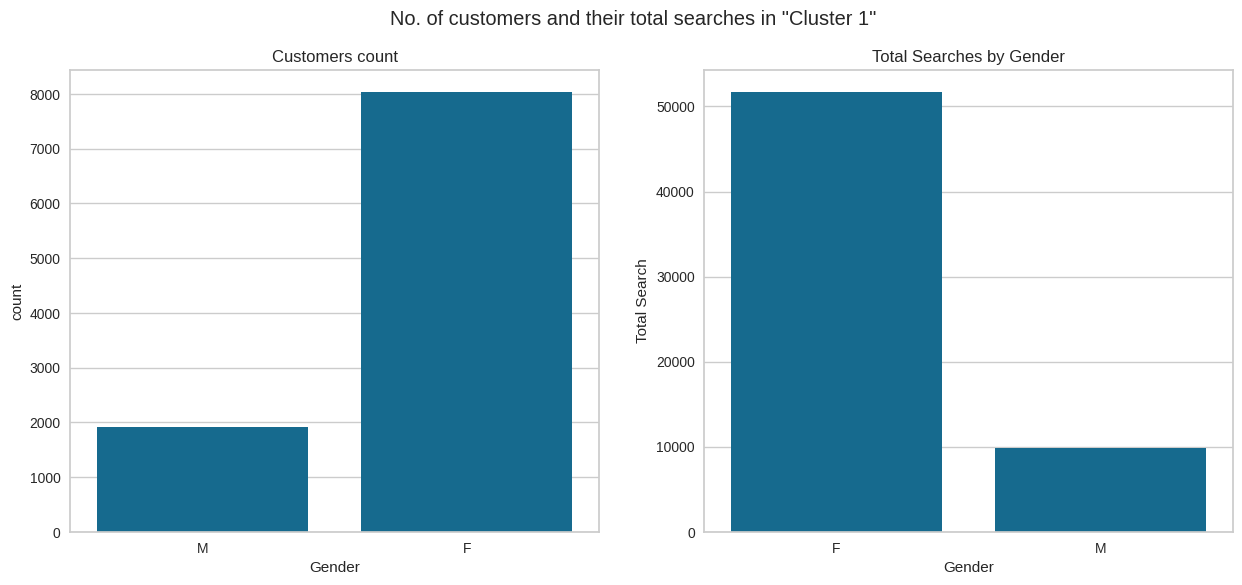

In [ ]:
plt.figure(figsize=(15,6)) # Change fig_size to figsize
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==1'),x='Gender')
plt.title('Customers count')

plt.subplot(1,2,2)
sns.barplot(data=cl_1,x='Gender',y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of customers and their total searches in "Cluster 1"')
plt.show()

In [ ]:
cl_2=c_df.groupby(['Cluster','Gender'], as_index=False).sum().query('Cluster==2')
cl_2

,Cluster,Gender,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
4,2,F,131857118,71203,2264,1939,2038,1763,1473,1285,...,2511,3904,1503,662,505,1665,1046,829,568,62998
5,2,M,26717912,15604,596,936,386,19,64,166,...,340,131,162,98,52,387,203,134,127,10727


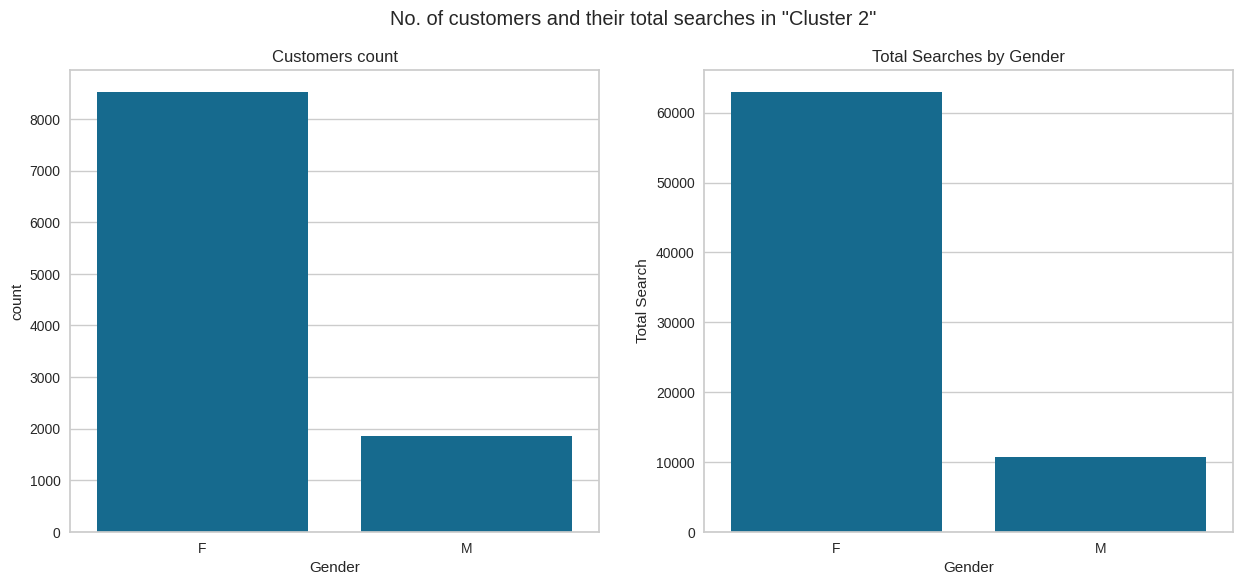

In [ ]:
plt.figure(figsize=(15,6)) # Change fig_size to figsize
plt.subplot(1,2,1)
sns.countplot(data=c_df.query('Cluster==2'),x='Gender')
plt.title('Customers count')

plt.subplot(1,2,2)
sns.barplot(data=cl_2,x='Gender',y='Total Search')
plt.title('Total Searches by Gender')
plt.suptitle('No. of customers and their total searches in "Cluster 2"')
plt.show()

In [ ]:
#OVERALL ANALYSIS

In [ ]:
final_df=c_df.groupby(['Cluster'],as_index=False).sum()
final_df

,Cluster,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,...,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft,Total Search
0,0,221193535,FFFFFFFFFFFFFFFFFFFFFMFFFFFFFFFFFFFMFFFFFFFFMF...,19441,3074,2547,2579,1869,1714,1484,...,3069,4027,1564,1108,751,1835,1060,772,843,70874
1,1,70246435,MFMFFFFFFFFFFFFFMFFFMFFFFFMFFFFFFFFFFFMMFMFMFF...,18846,2089,2148,1685,1189,1055,1258,...,2214,3040,1540,462,412,1879,1182,906,589,61544
2,2,158575030,FMFFFFMMFFMFMFMFFFMFMFMMFFFFFFFFFFFFFFFFFFFFFF...,86807,2860,2875,2424,1782,1537,1451,...,2851,4035,1665,760,557,2052,1249,963,695,73725


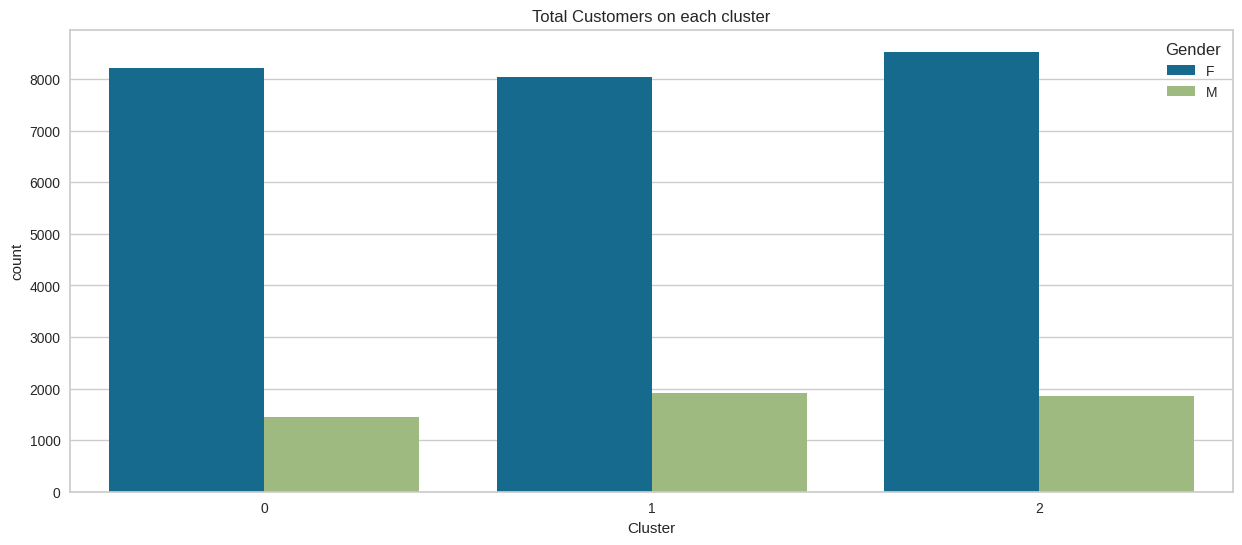

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(data=c_df,x='Cluster',hue='Gender')
plt.title('Total Customers on each cluster')
plt.show()

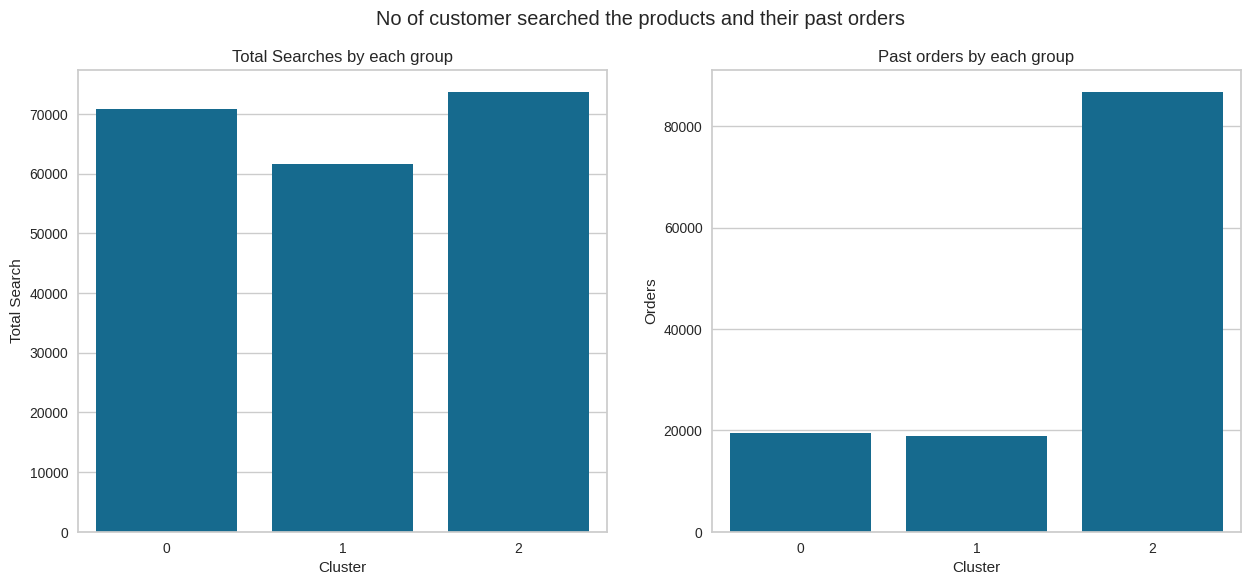

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=final_df,x='Cluster',y='Total Search')
plt.title('Total Searches by each group')

plt.subplot(1,2,2)
sns.barplot(data=final_df,x='Cluster',y='Orders')
plt.title('Past orders by each group')
plt.suptitle('No of customer searched the products and their past orders')
plt.show()